## Import Library

In [1]:
# import the library
from apyori import apriori
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
# read the datasets
movie_data = pd.read_csv('my_movies.csv')
movie_data.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


## Data Cleaning

In [3]:
# selecting specific rows
m_data = movie_data.iloc[ :, 5:]
m_data

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [4]:
m_data.columns.value_counts()

Harry Potter2    1
Green Mile       1
LOTR2            1
Patriot          1
LOTR1            1
LOTR             1
Harry Potter1    1
Sixth Sense      1
Braveheart       1
Gladiator        1
dtype: int64

In [5]:
m_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
Sixth Sense      10 non-null int64
Gladiator        10 non-null int64
LOTR1            10 non-null int64
Harry Potter1    10 non-null int64
Patriot          10 non-null int64
LOTR2            10 non-null int64
Harry Potter2    10 non-null int64
LOTR             10 non-null int64
Braveheart       10 non-null int64
Green Mile       10 non-null int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [6]:
m_data.isnull().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

- No missing values are found
- Data is in numeric format

## Basic Visualization

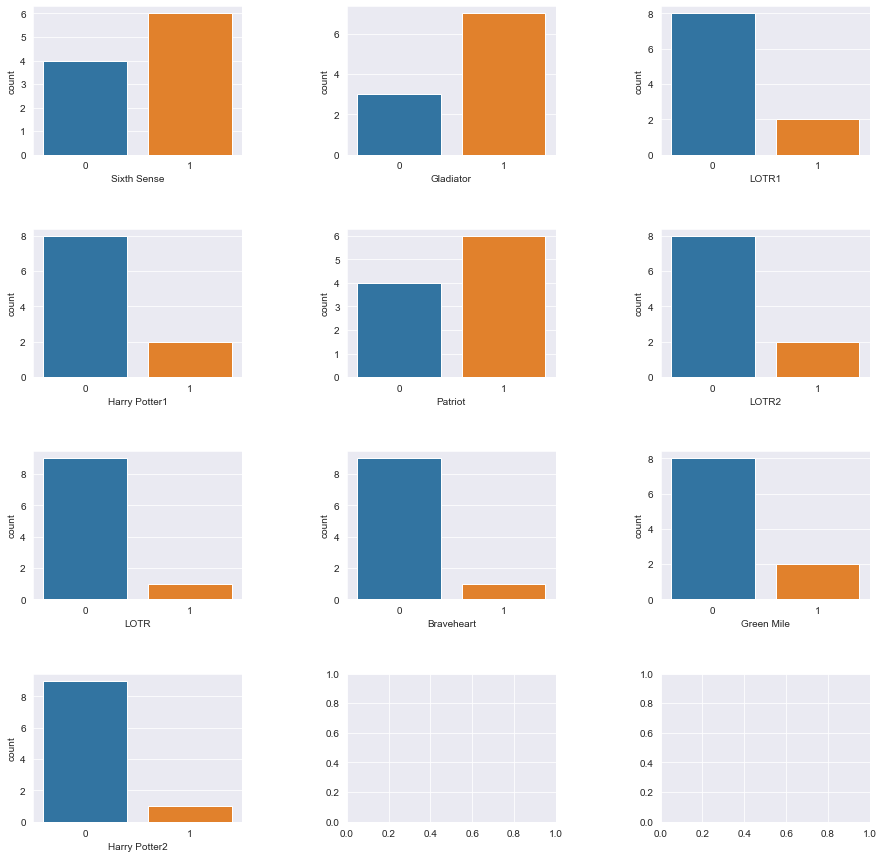

In [7]:
# basic counts for movies
fig, ax = plt.subplots(4, 3, figsize=(15, 15))

sns.countplot(m_data['Sixth Sense'], ax = ax[0, 0])
sns.countplot(m_data['Gladiator'], ax = ax[0, 1])
sns.countplot(m_data['LOTR1'], ax = ax[0, 2])
sns.countplot(m_data['Harry Potter1'], ax = ax[1, 0])
sns.countplot(m_data['Patriot'], ax = ax[1, 1])
sns.countplot(m_data['LOTR2'], ax = ax[1, 2])
sns.countplot(m_data['LOTR'], ax = ax[2, 0])
sns.countplot(m_data['Braveheart'], ax = ax[2, 1])
sns.countplot(m_data['Green Mile'], ax = ax[2, 2])
sns.countplot(m_data['Harry Potter2'], ax = ax[3, 0])

plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

## Analysis Part (Association)

##### A) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
##### B) Change the minimum length in apriori algorithm
##### C) Visulize the obtained rules using different plots

1) Combination 1:

    min support = 20 %
    max_len = 1
2) Combination 2:

    min support = 20 %
    max_len = 2
3) Combination 3:

    min support = 20 %
    max_len = 3
4) Combination 4:

    min support = 10 %
    max_len = 1
5) Combination 5:

    min support = 30 %
    max_len = 5


##### Combination 1

In [8]:
# apriori algorithm
frequent_movieSets_1 = apriori(m_data, min_support = 0.5, use_colnames=True, max_len = 1)
frequent_movieSets_1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)


In [9]:
# association rule criteria
rule_1 = association_rules(frequent_movieSets_1, metric='lift', min_threshold = 0.8)
rule_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


- With this combination, association rule is not work
- But we get the max support fot movie (Gladiator) about 0.7

##### Combination 2

In [10]:
# apriori algorithm
frequent_movieSets_2 = apriori(m_data, min_support = 0.5, use_colnames=True, max_len = 2)
frequent_movieSets_2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.6,"(Gladiator, Patriot)"


##### lift

In [11]:
# association rule criteria
rule_2L = association_rules(frequent_movieSets_2, metric='lift', min_threshold = 0.8)
rule_2L

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf


##### confidence

In [12]:
rule_2C = association_rules(frequent_movieSets_2, metric='confidence', min_threshold = 0.8)
rule_2C

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf


- With lift consideration, pair (Gladiator)-(Sixth Sense) is visible but with confidence consideration, pair is not exist
- With both analysis, values for the support + confidence + lift + leaverge + conviction are remains same
- conviction value is high for (Patriot)-(Gladiator) which means there is strong dependency exist

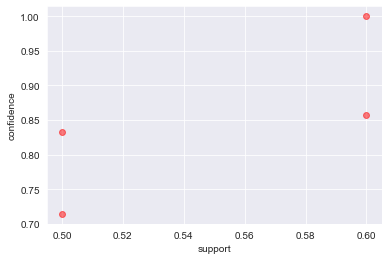

In [13]:
# support v/s confidence
support = rule_2L['support']
confidence = rule_2L['confidence']

plt.scatter(support, confidence, c = 'r', alpha = 0.5)
plt.xlabel('support')
plt.ylabel('confidence') 

plt.show()

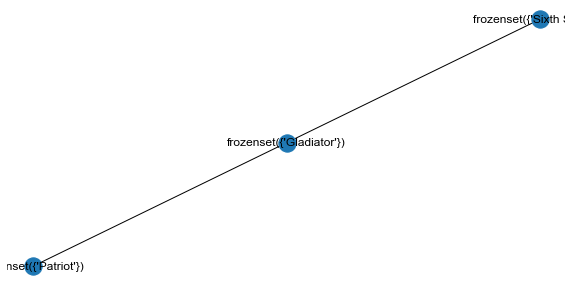

In [14]:
# graph visualization with node form
fig, ax = plt.subplots(figsize=(10,5))
GA = nx.from_pandas_edgelist(rule_2C , source = 'antecedents', target = 'consequents')
nx.draw(GA, with_labels = True)
plt.show()

- From above node diagram, if people watch the movie (Gladiator) then they also like to watch movies (Sixth Sense) and (Patriot)

##### Combination 3

In [15]:
# apriori algorithm
frequent_movieSets_3 = apriori(m_data, min_support = 0.5, use_colnames=True, max_len = 3)
frequent_movieSets_3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.6,"(Gladiator, Patriot)"


- With this combination, we have same result as previous case

##### Combination 4

In [16]:
# apriori algorithm
frequent_movieSets_4 = apriori(m_data, min_support = 0.1, use_colnames=True, max_len = 1)
frequent_movieSets_4

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [17]:
# association rule criteria
rule_4 = association_rules(frequent_movieSets_4, metric='lift', min_threshold = 1)
rule_4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


- With this combination, no association rule is work

##### Combination 5

In [18]:
# apriori algorithm
frequent_movieSets_5 = apriori(m_data, min_support = 0.03, use_colnames=True, max_len = 5)
frequent_movieSets_5

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


##### lift

In [19]:
# association rule criteria
rule_5L = association_rules(frequent_movieSets_5, metric='lift', min_threshold = 1)
rule_5L.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
159,"(Sixth Sense, Harry Potter1)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
214,"(LOTR2, Sixth Sense, Harry Potter1)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
185,"(Sixth Sense, Harry Potter1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
99,(LOTR),"(Gladiator, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
174,"(LOTR2, Green Mile)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
37,(Sixth Sense),"(Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
44,"(Gladiator, Sixth Sense)",(Green Mile),0.5,0.2,0.1,0.200000,1.000000,0.00,1.0


##### confidence

In [20]:
# association rule criteria
rule_5C = association_rules(frequent_movieSets_5, metric='confidence', min_threshold = 1)
rule_5C.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
79,"(LOTR2, Sixth Sense, Green Mile)",(LOTR1),0.1,0.2,0.1,1.0,5.000000,0.08,inf
92,"(LOTR2, Green Mile)","(Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
91,"(LOTR2, Sixth Sense)","(Harry Potter1, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
90,"(Harry Potter1, Green Mile)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
37,"(Green Mile, LOTR)",(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
36,"(Gladiator, LOTR)",(Green Mile),0.1,0.2,0.1,1.0,5.000000,0.08,inf
35,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.000000,0.09,inf
34,(Braveheart),"(Gladiator, Patriot)",0.1,0.6,0.1,1.0,1.666667,0.04,inf


In [21]:
# add condition: lift should be greater than 8 and confidence should be greater than 1
rule_5L = rule_5L[(rule_5L['lift'] >= 8) & (rule_5L['confidence'] >= 1)].sort_values('lift', ascending=False)
rule_5L_top7 = rule_5L.head(7)
rule_5L

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
94,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
220,"(LOTR1, Harry Potter1, Green Mile)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
200,"(LOTR1, Green Mile)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
201,"(LOTR2, Harry Potter1)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
203,"(LOTR2, Green Mile)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
213,"(LOTR1, Sixth Sense, Harry Potter1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
214,"(LOTR2, Sixth Sense, Harry Potter1)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
216,"(LOTR1, LOTR2, Sixth Sense)","(Harry Potter1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
217,"(LOTR1, Sixth Sense, Green Mile)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
218,"(LOTR2, Sixth Sense, Green Mile)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [22]:
# add condition: lift should be greater than 8 and confidence should be greater than 1
rule_5C = rule_5C[(rule_5C['lift'] >= 8) & (rule_5C['confidence'] >= 1)].sort_values('lift', ascending=False)
rule_5C_top7 = rule_5C.head(7)
rule_5C

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
35,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
114,"(LOTR1, Harry Potter1, Green Mile)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
98,"(LOTR1, Green Mile)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
99,"(LOTR2, Harry Potter1)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
101,"(LOTR2, Green Mile)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
107,"(LOTR1, Sixth Sense, Harry Potter1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
108,"(LOTR2, Sixth Sense, Harry Potter1)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
110,"(LOTR1, LOTR2, Sixth Sense)","(Harry Potter1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
111,"(LOTR1, Sixth Sense, Green Mile)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
112,"(LOTR2, Sixth Sense, Green Mile)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


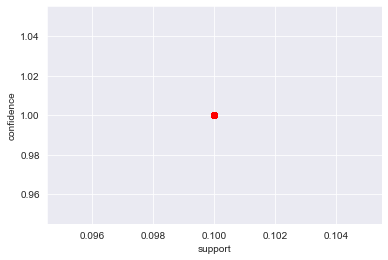

In [23]:
# support v/s confidence
support = rule_5L['support']
confidence = rule_5L['confidence']

plt.scatter(support, confidence, c = 'r', alpha = 0.5)
plt.xlabel('support')
plt.ylabel('confidence') 

plt.show()

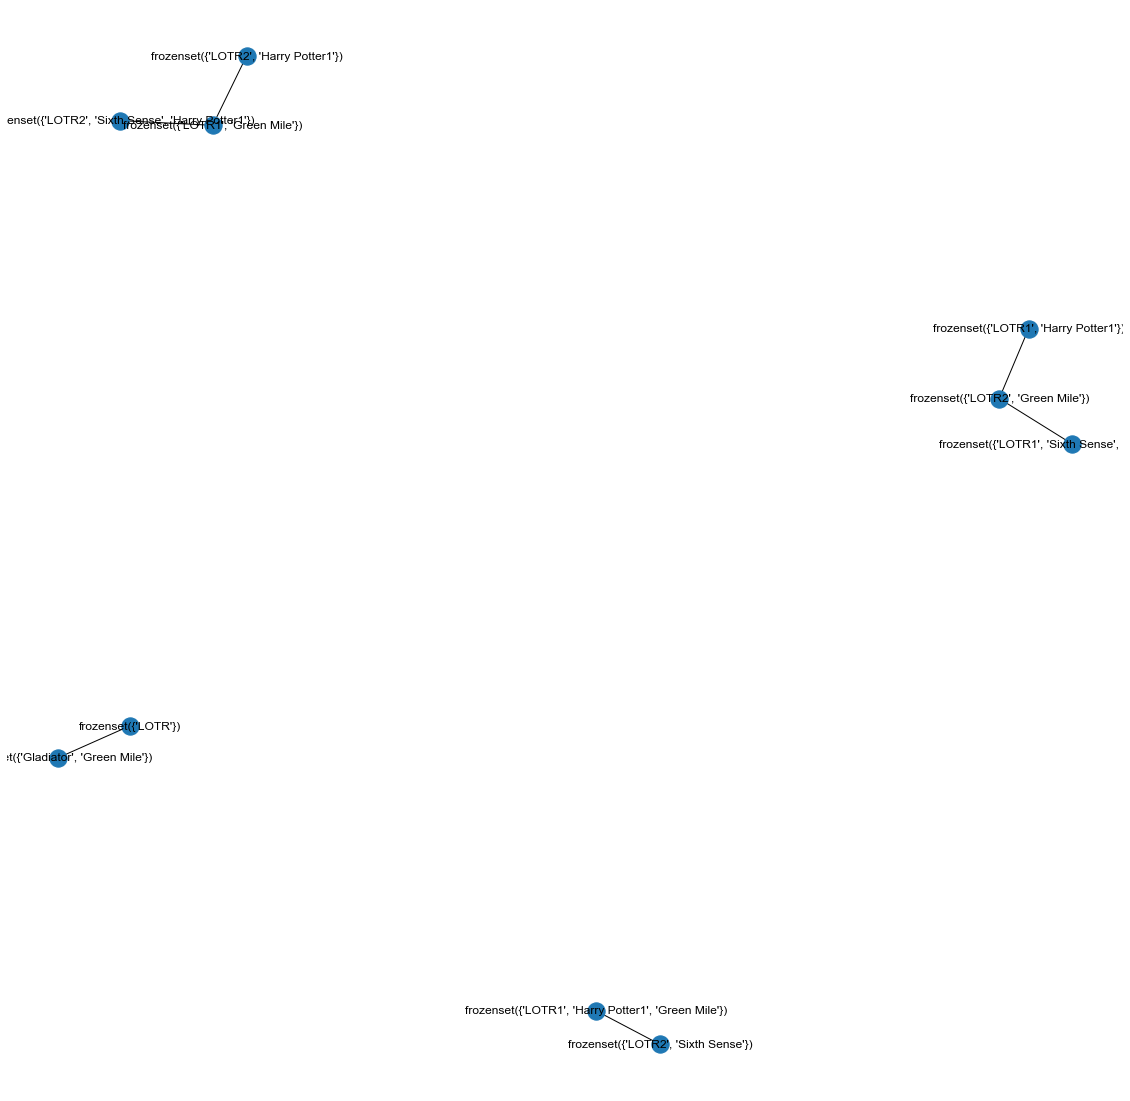

In [24]:
# graph visualization with node form
fig, ax = plt.subplots(figsize=(20,20))
GA = nx.from_pandas_edgelist(rule_5L_top7 , source = 'antecedents', target = 'consequents')
nx.draw(GA, with_labels = True)
plt.show()

- From above node diagram, there are 4 conclusions
- If people watch the movie (LOTR2, Green Mile) then they also like to watch movies (LOTR1, Harry Potter1) and (LOTR1, Sixth Sence, Harry Potter1)
- If people watch the movie (LOTR2, Green Mile) then they also like to watch movies (LOTR2, Harry Potter1) and (LOTR2, Sixth Sence, Harry Potter1)
- If people watch the movie (Harry Potter1, Green Mile) then they also like to watch movies (LOTR1, LOTR2, Sixth Sence)
- If people watch the movie (LOTR) then they also like to watch movies (Gladiator, Green Mile)
